In [ ]:
!pip install plotly ipywidgets --quiet




In [ ]:
!apt-get install -y libproj-dev proj-data proj-bin libgeos-dev
!pip install cython
!pip install cartopy


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 205 kB of archives.
After this operation, 521 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 205 kB in 2s (111 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.3.1-1~jammy0) ...
Setting up proj

In [ ]:
pip install cartopy matplotlib pandas


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AntarcticIcebergs_20200717.csv to AntarcticIcebergs_20200717.csv
Saving AntarcticIcebergs_20250718.csv to AntarcticIcebergs_20250718.csv


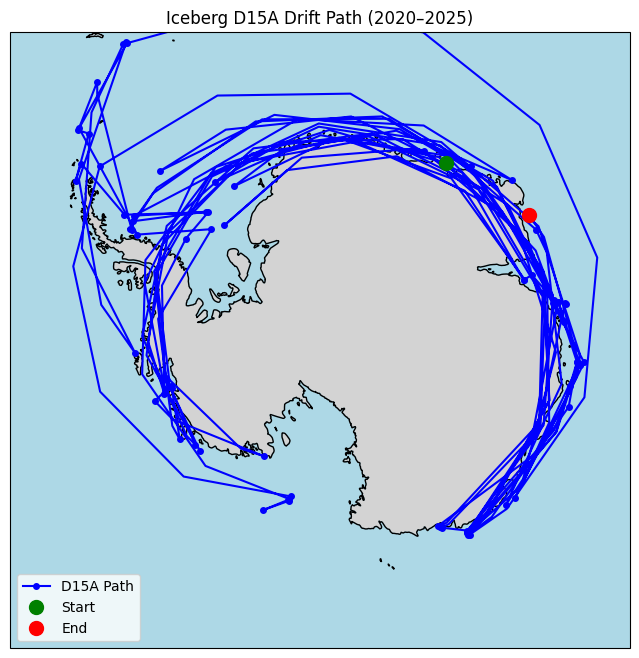

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the two CSVs
df1 = pd.read_csv('/content/AntarcticIcebergs_20200717.csv')
df2 = pd.read_csv('/content/AntarcticIcebergs_20250718.csv')

# Combine the data
df = pd.concat([df1, df2], ignore_index=True)

# Drop rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Sort by 'Last Update' if needed
df = df.sort_values(by='Last Update')

# Setup the plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.coastlines()

# Plot drift path as a connected blue line
ax.plot(df['Longitude'].values, df['Latitude'].values,
        color='blue', linewidth=1.5, marker='o', markersize=4,
        transform=ccrs.PlateCarree(), label='D15A Path')

# Mark the start point
start_lat = df.iloc[0]['Latitude']
start_lon = df.iloc[0]['Longitude']
ax.plot(start_lon, start_lat, 'go', markersize=10, transform=ccrs.PlateCarree(), label='Start')

# Mark the end point
end_lat = df.iloc[-1]['Latitude']
end_lon = df.iloc[-1]['Longitude']
ax.plot(end_lon, end_lat, 'ro', markersize=10, transform=ccrs.PlateCarree(), label='End')

# Add legend and title
plt.title('Iceberg D15A Drift Path (2020–2025)')
plt.legend(loc='lower left')

plt.show()













Start Data:
   Iceberg  Length (NM)  Width (NM)  Latitude  Longitude           Remarks  \
0    A23A           44          40    -75.75     -40.78             belle   
1     A63           11           3    -75.17     -45.42             belle   
2     A64           16          11    -69.73     -60.99  belle (grounded)   
3    A68A           82          26    -59.50     -49.21             belle   
4    A68C            9           5    -57.69     -41.20             belle   

  Last Update  
0   7/17/2020  
1   7/17/2020  
2   7/17/2020  
3   7/17/2020  
4   7/17/2020  
End Data:
   Iceberg  Length (NM)  Width (NM)  Latitude  Longitude  Area (sqMI)  \
0    A23A           40          32    -56.43     -33.98       968.91   
1    A23D           13           6    -56.44     -33.42        61.57   
2    A23E            9           4    -56.51     -33.26        28.20   
3    A74A           30          18    -59.55     -49.62       381.34   
4    A76C           16           7    -60.50     -48.80  

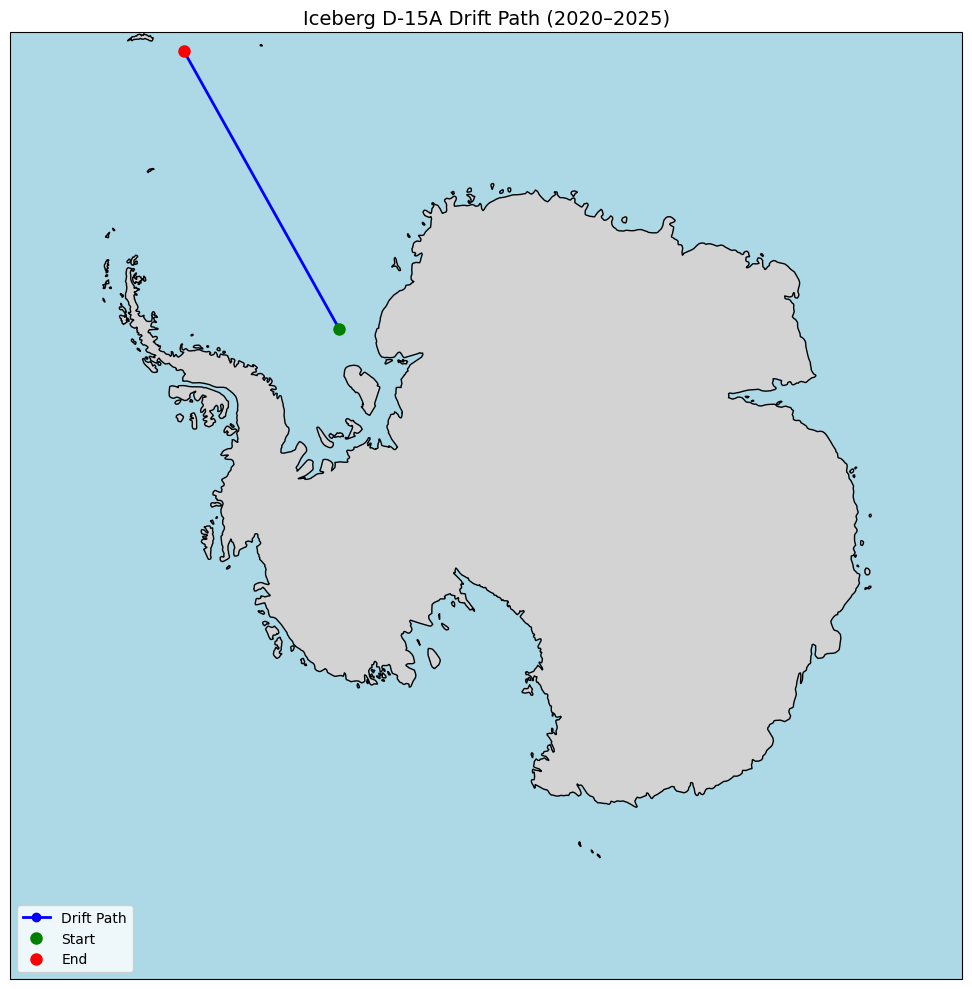

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load iceberg drift data (your latest approach is correct here)
df_start = pd.read_csv("AntarcticIcebergs_20200717.csv")
df_end = pd.read_csv("AntarcticIcebergs_20250718.csv")

# Print to confirm the data loads correctly
print("Start Data:\n", df_start.head())
print("End Data:\n", df_end.head())

# Extract coordinates – adjust column names as needed
start_lat = df_start['Latitude'].iloc[0]
start_lon = df_start['Longitude'].iloc[0]
end_lat = df_end['Latitude'].iloc[0]
end_lon = df_end['Longitude'].iloc[0]

# Set up plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Add base map features
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=0, color='lightgray')
ax.add_feature(cfeature.OCEAN, zorder=0, color='lightblue')
ax.coastlines()

# Plot drift path
ax.plot([start_lon, end_lon], [start_lat, end_lat],
        color='blue', linewidth=2, marker='o',
        transform=ccrs.PlateCarree(), label='Drift Path')

# Markers
ax.plot(start_lon, start_lat, 'go', markersize=8, transform=ccrs.PlateCarree(), label='Start')
ax.plot(end_lon, end_lat, 'ro', markersize=8, transform=ccrs.PlateCarree(), label='End')

# Legend and title
plt.legend(loc='lower left')
plt.title('Iceberg D-15A Drift Path (2020–2025)', fontsize=14)
plt.tight_layout()
plt.show()







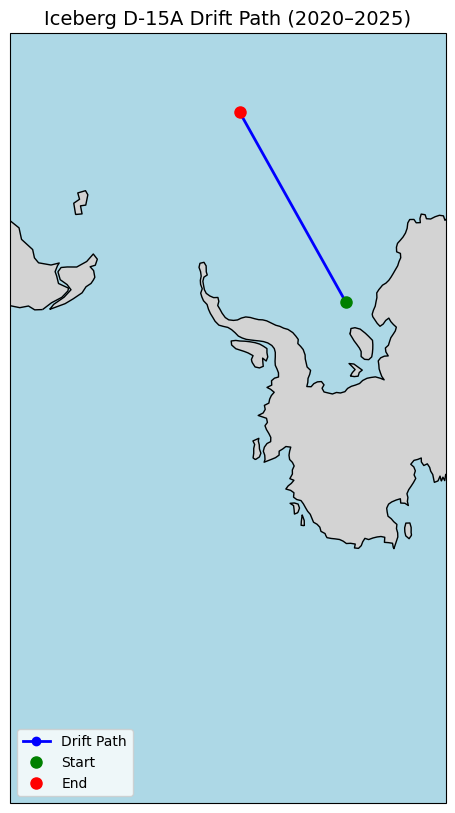

In [ ]:
# Iceberg D-15A Drift Path Visualization (2020–2025)

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load iceberg drift data
df_start = pd.read_csv("AntarcticIcebergs_20200717.csv")
df_end = pd.read_csv("AntarcticIcebergs_20250718.csv")

# Extract coordinates
lat_start = df_start['Latitude'].values[0]
lon_start = df_start['Longitude'].values[0]
lat_end = df_end['Latitude'].values[0]
lon_end = df_end['Longitude'].values[0]

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Set extent to show West Antarctica where D15A originated
ax.set_extent([-150, -30, -90, -50], crs=ccrs.PlateCarree())

# Add geographic features
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.coastlines()

# Plot drift path
ax.plot([lon_start, lon_end], [lat_start, lat_end],
        color='blue', linewidth=2, marker='o',
        transform=ccrs.PlateCarree(), label="Drift Path")

# Start and End markers
ax.plot(lon_start, lat_start, 'o', color='green', markersize=8,
        transform=ccrs.PlateCarree(), label="Start")
ax.plot(lon_end, lat_end, 'o', color='red', markersize=8,
        transform=ccrs.PlateCarree(), label="End")

# Title and legend
plt.title("Iceberg D-15A Drift Path (2020–2025)", fontsize=14)
plt.legend(loc='lower left')
plt.show()



In [ ]:
pip install panel cartopy matplotlib pandas


In [ ]:
!pip install panel jupyter_bokeh pyngrok geopandas cartopy


👉 Public URL: NgrokTunnel: "https://159e120d7e7a.ngrok-free.app" -> "http://localhost:5006"
Launching server at http://0.0.0.0:5006


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


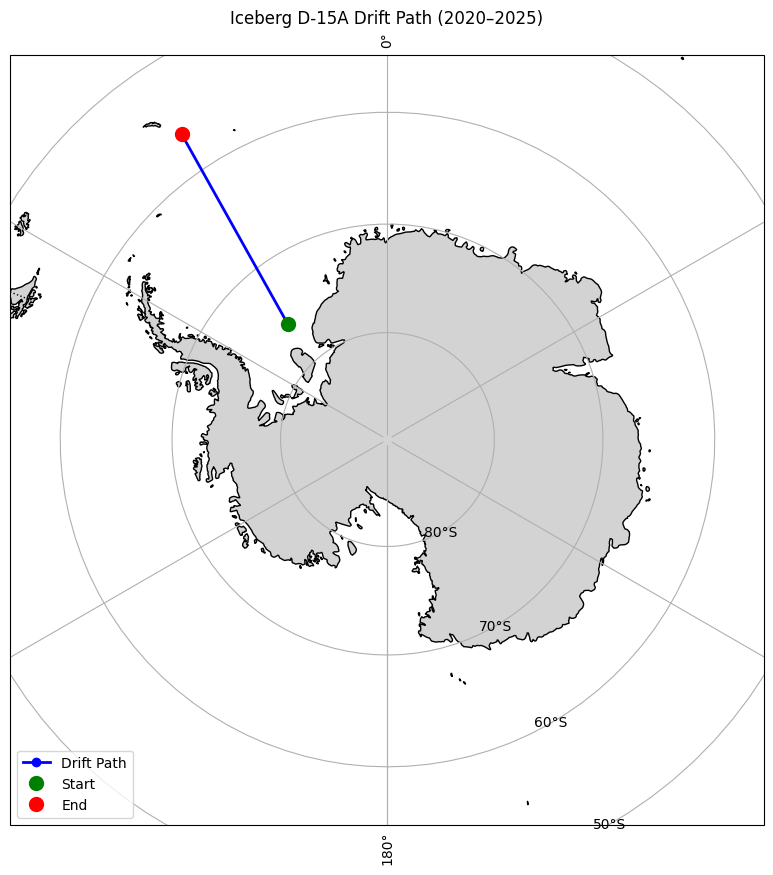

In [ ]:

import panel as pn
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyngrok import ngrok

# ✅ STEP 3: Enable Panel extension for Bokeh
pn.extension('tabulator', sizing_mode="stretch_width")

# ✅ STEP 4: Load iceberg start and end data (upload these CSVs to Colab)
df_start = pd.read_csv("AntarcticIcebergs_20200717.csv")
df_end = pd.read_csv("AntarcticIcebergs_20250718.csv")

# ✅ STEP 5: Plot function
def plot_drift_map():
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -55], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True)

    # Plot drift line
    ax.plot(
        [df_start['Longitude'][0], df_end['Longitude'][0]],
        [df_start['Latitude'][0], df_end['Latitude'][0]],
        color='blue', linewidth=2, marker='o',
        transform=ccrs.PlateCarree(),
        label='Drift Path'
    )

    # Mark start and end
    ax.plot(df_start['Longitude'][0], df_start['Latitude'][0], 'go', markersize=10, transform=ccrs.PlateCarree(), label='Start')
    ax.plot(df_end['Longitude'][0], df_end['Latitude'][0], 'ro', markersize=10, transform=ccrs.PlateCarree(), label='End')

    ax.legend(loc='lower left')
    ax.set_title("Iceberg D-15A Drift Path (2020–2025)")
    return fig

# ✅ STEP 6: Create Panel dashboard layout
dashboard = pn.Column(
    "# Iceberg D-15A Drift Path Dashboard",
    "This dashboard shows the iceberg's drift from July 2020 to July 2025.",
    pn.pane.Matplotlib(plot_drift_map(), tight=True)
)

# ✅ STEP 7: Start ngrok tunnel
ngrok.set_auth_token("32KweUivgCnvJnIQz7r7DDSUZC1_47GkHi63sVDtsGSaEQuVr")  # 🔁 Replace with your token
public_url = ngrok.connect(5006)
print("👉 Public URL:", public_url)

# ✅ STEP 8: Serve the dashboard (don't auto-open)
pn.serve(dashboard, port=5006, address="0.0.0.0", show=False)


In [ ]:
panel serve iceberg_dashboard.py


SyntaxError: invalid syntax (ipython-input-772359883.py, line 1)

In [ ]:
pn.serve(dashboard, show=True)


Launching server at http://localhost:38401
